In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [28]:
df = pd.read_csv(r'/kaggle/input/3sec-features/3sec_features.csv')
df.head()

,name,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,actual_multi_genre
0,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.415807,0.072298,0.272616,0.003458,1071.405850,124830.7978,1579.811905,172801.64380,...,32.417294,7.014239,27.476717,-1.217601,28.785315,0.618297,26.961672,-7.396918,28.644170,"Rock, Pop"
1,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.411221,0.077621,0.271611,0.004101,1091.232379,251883.2784,1593.324615,294182.07410,...,27.733225,-1.383345,39.802162,-5.495392,36.830288,7.911010,34.455340,3.651210,35.311550,"Rock, Pop"
2,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.511829,0.069412,0.291631,0.003943,1051.140250,114751.6252,1558.870991,152172.72120,...,30.249128,7.220845,25.881824,-2.801634,27.722574,2.708024,22.639078,-6.220536,39.085777,"Rock, Pop"
3,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.449659,0.073253,0.333232,0.003267,967.553472,120096.4001,1449.365069,161182.69100,...,31.660627,-2.379893,34.448370,-2.409710,41.797516,2.381857,44.143787,-10.076764,60.215656,"Rock, Pop"
4,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.406737,0.080221,0.327889,0.003120,959.808356,59398.2795,1426.996671,96487.01836,...,32.847797,3.834526,23.280157,-3.457653,32.983295,2.285278,20.172178,-6.665225,23.908913,"Rock, Pop"


In [29]:
rows = df.shape[0]
cols = df.shape[1]
print(f"Rows are: {rows} and columns are {cols}")

Rows are: 24620 and columns are 60


In [30]:
features = df.iloc[:,2:59]
features

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.415807,0.072298,0.272616,0.003458,1071.405850,124830.797800,1579.811905,172801.64380,2326.916174,1.133194e+06,...,-0.529794,32.417294,7.014239,27.476717,-1.217601,28.785315,0.618297,26.961672,-7.396918,28.644170
1,0.411221,0.077621,0.271611,0.004101,1091.232379,251883.278400,1593.324615,294182.07410,2458.027608,2.191394e+06,...,-6.527108,27.733225,-1.383345,39.802162,-5.495392,36.830288,7.911010,34.455340,3.651210,35.311550
2,0.511829,0.069412,0.291631,0.003943,1051.140250,114751.625200,1558.870991,152172.72120,2239.286845,9.873727e+05,...,4.105564,30.249128,7.220845,25.881824,-2.801634,27.722574,2.708024,22.639078,-6.220536,39.085777
3,0.449659,0.073253,0.333232,0.003267,967.553472,120096.400100,1449.365069,161182.69100,1997.266945,9.988308e+05,...,-6.826433,31.660627,-2.379893,34.448370,-2.409710,41.797516,2.381857,44.143787,-10.076764,60.215656
4,0.406737,0.080221,0.327889,0.003120,959.808356,59398.279500,1426.996671,96487.01836,1878.834327,5.051104e+05,...,-2.525133,32.847797,3.834526,23.280157,-3.457653,32.983295,2.285278,20.172178,-6.665225,23.908913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24615,0.295226,0.094016,0.021039,0.000056,291.978067,10063.002590,611.850135,24364.56725,375.542388,5.932551e+04,...,4.876591,38.339024,5.372583,25.366219,1.952211,50.508247,-0.673771,79.792470,-5.530555,63.067703
24616,0.283132,0.083223,0.052595,0.000264,292.447448,1168.048694,262.158416,9734.02002,420.105310,5.018519e+03,...,-2.352866,22.237856,3.869124,25.358006,3.410983,40.967182,-2.775848,40.147373,-6.390646,55.431150
24617,0.240055,0.079368,0.045204,0.000315,306.645198,7032.938495,349.910501,23974.73184,463.296426,2.565619e+04,...,-6.420828,44.450710,-6.042143,48.116177,-4.489713,37.759995,-2.741151,33.541245,-1.366368,44.849674
24618,0.285041,0.085068,0.033291,0.000050,235.185748,4547.305221,232.738334,26629.64422,349.685916,1.492662e+04,...,-18.476357,16.999535,-14.717143,21.652325,-9.331166,25.001644,-9.926890,16.550720,-9.825608,11.176955


In [31]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data to compute the mean and standard deviation
scaler.fit(features)

# Transform (normalize) your data
features = scaler.transform(features)

In [32]:
print(features)

[[-0.23778143 -0.56958284  1.39860879 ... -0.64350893 -0.78104998
  -0.60403813]
 [-0.2823771  -0.19301091  1.38597871 ... -0.405898    1.4735443
  -0.39272929]
 [ 0.69592554 -0.77372126  1.63751961 ... -0.78057072 -0.54098536
  -0.27311295]
 ...
 [-1.94678015 -0.06945085 -1.45868283 ... -0.43488233  0.44960593
  -0.09043814]
 [-1.50934026  0.3337232  -1.60835611 ... -0.97362175 -1.27667336
  -1.15762545]
 [-1.51104982  0.4774126  -1.46243548 ... -0.65832789 -1.6726923
  -0.4270052 ]]


In [33]:
genres = df['actual_multi_genre']
genres[342]

'Rock, Metal'

In [34]:
set_genre = set()
for i in genres:
    set_genre = set_genre.union(set((i.split(', '))))

# for genre in genres.split(','):
#     genre = genre.strip()  # Remove leading/trailing spaces
#     set_genre.add(genre)
actual_genre = list(set_genre)
print(*actual_genre,sep="\n")
print(f"The length is {len(actual_genre)}")

Country
Reggae
Jazz
Pop
Blues
Rock
Soul
R&B
Rap & Hip-Hop
Classical
Dance & Electronic
Punk
Folk
Metal
Bebop
The length is 15


In [36]:
for genre in actual_genre:
    df[genre] = 0  # Initialize all new columns with 0
def one_hot_encode(row):
    for genre in row['actual_multi_genre'].split(', '):
        if genre in actual_genre:
            row[genre] = 1
    return row

df = df.apply(one_hot_encode, axis=1)

In [11]:
df.drop('actual_multi_genre', axis=1,inplace=True)

In [12]:
df.head()

,name,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,Rock,Soul,R&B,Rap & Hip-Hop,Classical,Dance & Electronic,Punk,Folk,Metal,Bebop
0,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.415807,0.072298,0.272616,0.003458,1071.405850,124830.7978,1579.811905,172801.64380,...,1,0,0,0,0,0,0,0,0,0
1,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.411221,0.077621,0.271611,0.004101,1091.232379,251883.2784,1593.324615,294182.07410,...,1,0,0,0,0,0,0,0,0,0
2,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.511829,0.069412,0.291631,0.003943,1051.140250,114751.6252,1558.870991,152172.72120,...,1,0,0,0,0,0,0,0,0,0
3,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.449659,0.073253,0.333232,0.003267,967.553472,120096.4001,1449.365069,161182.69100,...,1,0,0,0,0,0,0,0,0,0
4,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.406737,0.080221,0.327889,0.003120,959.808356,59398.2795,1426.996671,96487.01836,...,1,0,0,0,0,0,0,0,0,0


In [13]:
labels = df.iloc[:,59:75]
print(*labels,sep="\n")
labels = labels.values
print(labels)

Country
Reggae
Jazz
Pop
Blues
Rock
Soul
R&B
Rap & Hip-Hop
Classical
Dance & Electronic
Punk
Folk
Metal
Bebop
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

**XGB CLASSIFIER**

#XGBClassifier


In [38]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [39]:

clf = xgb.XGBClassifier(
    objective='binary:logistic',  
    use_label_encoder=False,  
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.46
              precision    recall  f1-score   support

           0       0.87      0.36      0.51       729
           1       0.99      0.61      0.75       220
           2       0.85      0.51      0.64      1334
           3       0.94      1.00      0.97      7297
           4       0.93      0.47      0.63       899
           5       0.83      0.82      0.82      4329
           6       0.93      0.45      0.61       663
           7       0.92      0.49      0.64      1055
           8       0.93      0.69      0.80       652
           9       0.90      0.46      0.61       246
          10       0.94      0.54      0.69      1291
          11       0.92      0.59      0.72       696
          12       0.83      0.45      0.58       871
          13       0.92      0.59      0.72       883
          14       0.92      0.41      0.57       331

   micro avg       0.90      0.74      0.81     21496
   macro avg       0.91      0.56      0.68     21496
weighted av

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


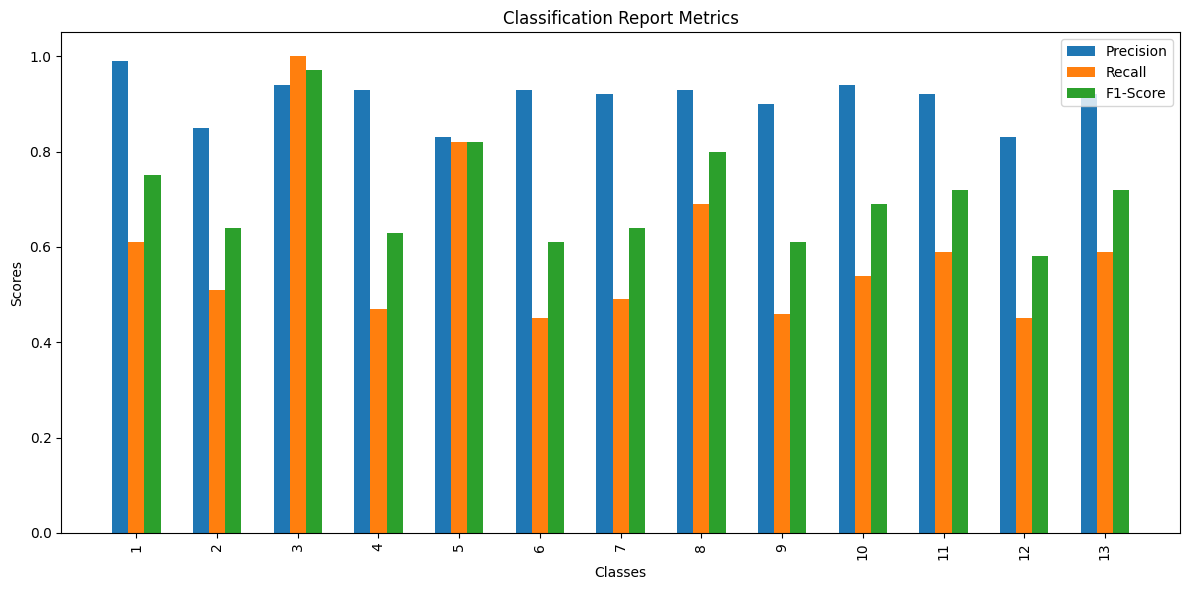

In [40]:
import matplotlib.pyplot as plt

# Replace this string with your classification report
classification_report_str = """
precision    recall  f1-score   support

           0       0.87      0.36      0.51       729
           1       0.99      0.61      0.75       220
           2       0.85      0.51      0.64      1334
           3       0.94      1.00      0.97      7297
           4       0.93      0.47      0.63       899
           5       0.83      0.82      0.82      4329
           6       0.93      0.45      0.61       663
           7       0.92      0.49      0.64      1055
           8       0.93      0.69      0.80       652
           9       0.90      0.46      0.61       246
          10       0.94      0.54      0.69      1291
          11       0.92      0.59      0.72       696
          12       0.83      0.45      0.58       871
          13       0.92      0.59      0.72       883
          14       0.92      0.41      0.57       331

   micro avg       0.90      0.74      0.81     21496
   macro avg       0.91      0.56      0.68     21496
weighted avg       0.90      0.74      0.79     21496
 samples avg       0.90      0.77      0.80     21496
"""

# Parse the classification report
report_lines = classification_report_str.split('\n')
report_data = [line.split() for line in report_lines if line]

# Extract the data for precision, recall, and F1-score
labels = [data[0] for data in report_data[2:-5]]  # Exclude the last 4 lines
precision = [float(data[1]) for data in report_data[2:-5]]
recall = [float(data[2]) for data in report_data[2:-5]]
f1_score = [float(data[3]) for data in report_data[2:-5]]

# Create a bar graph to visualize the metrics
x = range(len(labels))
width = 0.2

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.bar(x, precision, width, label='Precision', align='center')
plt.bar([i + width for i in x], recall, width, label='Recall', align='center')
plt.bar([i + 2 * width for i in x], f1_score, width, label='F1-Score', align='center')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks([i + width for i in x], labels, rotation=90)  # Rotate x-axis labels for readability
plt.legend(loc='best')

plt.tight_layout()  # Adjusts spacing to prevent clipping of labels
plt.show()
